In [25]:
## import libraries
import pandas as pd
import matplotlib.pyplot as plt

Load Datasets

In [26]:
ba=pd.read_csv("birth_attendant.csv")

In [27]:
ba=ba[ba['GEO_NAME_SHORT']=='Nigeria']

In [28]:
ba=ba[['GEO_NAME_SHORT','DIM_TIME','RATE_PER_100_N']]

In [29]:
ba.head()

,GEO_NAME_SHORT,DIM_TIME,RATE_PER_100_N
140,Nigeria,2011,47.0
286,Nigeria,2003,35.0
767,Nigeria,2018,43.0
1272,Nigeria,2013,35.0
1602,Nigeria,2016-2017,43.0


In [30]:
mm=pd.read_csv("marternal_mortality.csv")

In [31]:
mm=mm[mm['GEO_NAME_SHORT']=='Nigeria']

In [32]:
mm=mm[['GEO_NAME_SHORT','DIM_TIME','RATE_PER_100000_N']]

In [33]:
mm.head()

,GEO_NAME_SHORT,DIM_TIME,RATE_PER_100000_N
38,Nigeria,1986,1363.482553
220,Nigeria,1993,1200.013690
380,Nigeria,1989,1304.408824
562,Nigeria,1996,1185.330046
617,Nigeria,1985,1343.561856


In [34]:
print(mm['DIM_TIME'].dtype)

int64


In [35]:
print(ba['DIM_TIME'].dtype)

object


In [36]:
mm['DIM_TIME']=mm['DIM_TIME'].astype(str)
ba['DIM_TIME']=ba['DIM_TIME'].astype(str)

In [37]:
## Merge on year
df=mm.merge(ba, on='DIM_TIME', how= 'inner')

In [38]:
df.rename(columns={'RATE_PER_100000_N':'maternal_mortality_rate', 'RATE_PER_100_N':'skilled_birth_attendance', 'DIM_TIME':'year'}, inplace = True)

In [39]:
df.drop(['GEO_NAME_SHORT_x','GEO_NAME_SHORT_y'], axis=1, inplace=True)

In [40]:
df

,year,maternal_mortality_rate,skilled_birth_attendance
0,2003,1090.391534,35.0
1,2013,1146.022055,35.0
2,2022,1016.336736,51.0
3,2008,1081.429754,34.0
4,2011,1107.970104,47.0
5,2018,1118.378697,43.0


In [41]:
df=df.sort_values(by='year')

Trend Analysis

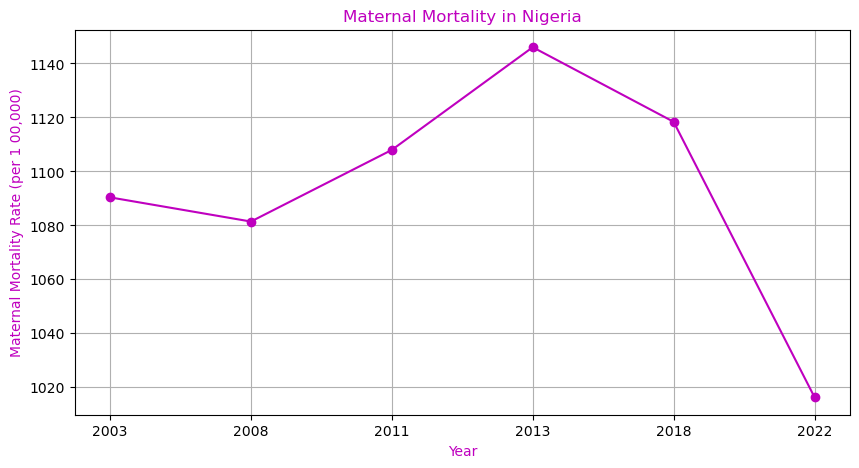

In [42]:
plt.figure(figsize=(10,5))
plt.plot(df['year'], df['maternal_mortality_rate'], 'm-o')
plt.title('Maternal Mortality in Nigeria',color='m')
plt.ylabel('Maternal Mortality Rate (per 1 00,000)', color='m')
plt.xlabel('Year', color= 'm')
plt.grid(True)
plt.show()

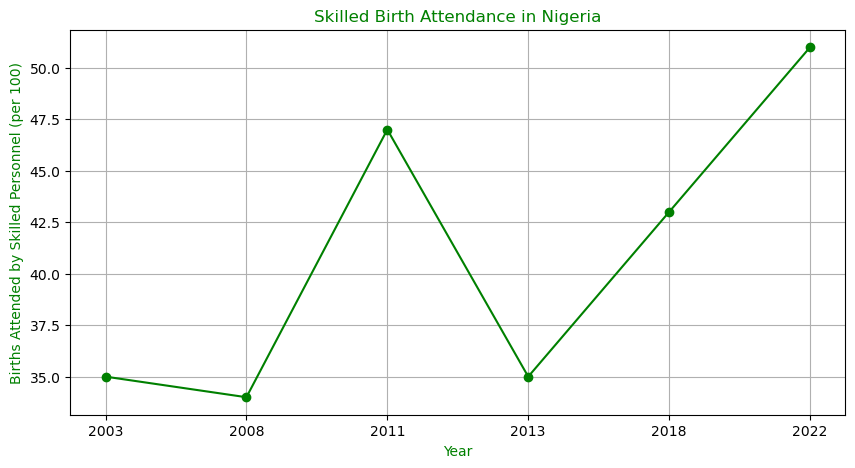

In [43]:
plt.figure(figsize=(10,5))
plt.plot(df['year'], df['skilled_birth_attendance'], 'g-o')
plt.title('Skilled Birth Attendance in Nigeria', color='g')
plt.ylabel('Births Attended by Skilled Personnel (per 100)', color= 'g')
plt.xlabel('Year', color='g')
plt.grid(True)
plt.show()

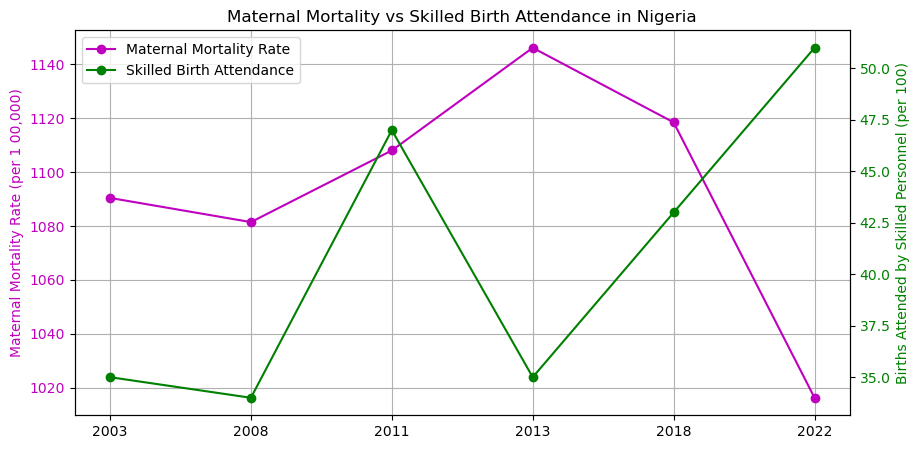

In [44]:
fig, ax1=plt.subplots(figsize=(10,5))
l1,=ax1.plot(df['year'], df['maternal_mortality_rate'], 'm-o', label= 'Maternal Mortality Rate')
ax1.set_ylabel('Maternal Mortality Rate (per 1 00,000)', color='m')
ax1.tick_params(axis='y', labelcolor='m')

ax2=ax1.twinx()
l2,=ax2.plot(df['year'], df['skilled_birth_attendance'], 'g-o', label= 'Skilled Birth Attendance')
ax2.set_ylabel('Births Attended by Skilled Personnel (per 100)', color= 'g')
ax2.tick_params(axis='y', labelcolor='g')

lines=[l1,l2]
labels=[line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

ax1.grid(True)
plt.title('Maternal Mortality vs Skilled Birth Attendance in Nigeria')
plt.show()

In [45]:
## Correlation Analysis
df[['maternal_mortality_rate',	'skilled_birth_attendance']].corr()

,maternal_mortality_rate,skilled_birth_attendance
maternal_mortality_rate,1.000000,-0.532672
skilled_birth_attendance,-0.532672,1.000000
